Assignment 2

In this assignment you'll explore the relationship between model complexity and generalization performance, by adjusting key parameters of various supervised learning models. Part 1 of this assignment will look at regression and Part 2 will look at classification

Part 1 - Regression

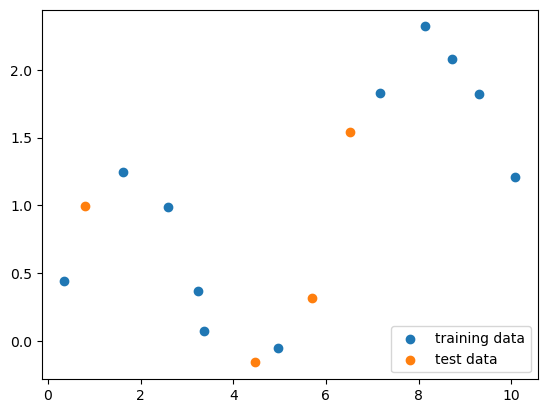

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

def intro():

    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);

intro()

### Question 1

Write a function that fits a polynomial LinearRegression model on the *training data* `X_train` for degrees 1, 3, 6, and 9. (Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. `np.linspace(0,10,100)`) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

<img src="assets/polynomialreg1.png" style="width: 1000px;"/>

The figure above shows the fitted models plotted on top of the original data (using `plot_one()`).

<br>
*This function should return a numpy array with shape `(4, 100)`*

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


def answer_one():
    
    # This is a 2D numpy array with 4 rows and 100 columns.
    # Each row will store the predictions corresponding to polynomial models of degrees 1, 3, 6, and 9, respectively.
    degree_predictions = np.zeros((4,100))

    # The first dimension (4) corresponds to the four different polynomial degrees,
    # and the second dimension (100) corresponds to the 100 points where predictions will be made.

    # YOUR CODE HERE

    # Generates 100 evenly spaced values between 0 and 10. This will be the range over which you make predictions.
    x_values = np.linspace(0, 10, 100).reshape(-1, 1)  # 100 points between 0 and 10
    

    X_train_reshaped = X_train.reshape(-1, 1)
    
    degrees = [1, 3, 6, 9]
    
    for i, degree in enumerate(degrees):
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train_reshaped)
        
        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        
        X_values_poly = poly.transform(x_values)
        predictions = model.predict(X_values_poly)
        
        degree_predictions[i, :] = predictions
    
    return degree_predictions

    raise NotImplementedError()

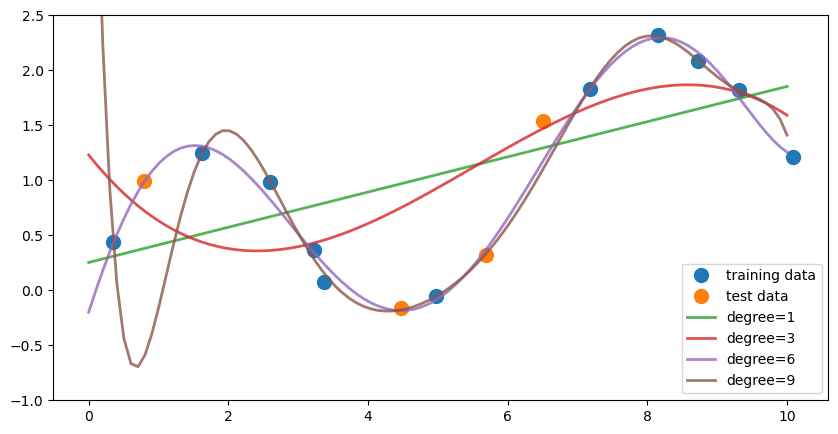

In [8]:
# feel free to use the function plot_one() to replicate the figure 
# from the prompt once you have completed question one
def plot_one(degree_predictions):
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(answer_one())

Question 2

Write a function that fits a polynomial LinearRegression model on the training data X_train for degrees 0 through 9. For each model compute the  𝑅2 (coefficient of determination) regression score on the training data as well as the the test data, and return both of these arrays in a tuple.

This function should return a tuple of numpy arrays (r2_train, r2_test). Both arrays should have shape (10,)

In [31]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics import r2_score

    r2_train = []  # Initialize as a list
    r2_test = []  # Initialize as a list
    
    degrees = range(10)  # Degree levels 0 through 9

    for degree in degrees:
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
        X_test_poly = poly.transform(X_test.reshape(-1, 1))
        
        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        
        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)
        
        r2_train_score = r2_score(y_train, y_train_pred)
        r2_test_score = r2_score(y_test, y_test_pred)
        
        r2_train.append(r2_train_score)  # Append the score to the list
        r2_test.append(r2_test_score)  # Append the score to the list
    
    r2_train = np.array(r2_train)  # Convert to numpy array
    r2_test = np.array(r2_test)  # Convert to numpy array
    
    return r2_train, r2_test
    raise NotImplementedError()

In [32]:
answer_two()

(array([0.        , 0.42924578, 0.4510998 , 0.58719954, 0.91941945,
        0.97578641, 0.99018233, 0.99352509, 0.99637545, 0.99803706]),
 array([-0.47808642, -0.45237104, -0.06856984,  0.00533105,  0.73004943,
         0.87708301,  0.9214094 ,  0.92021504,  0.63247949, -0.64524897]))

Question 3

Based on the  𝑅2  scores from question 2 (degree levels 0 through 9), what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset?

(Hint: Try plotting the  𝑅2  scores from question 2 to visualize the relationship)

This function should return a tuple with the degree values in this order: (Underfitting, Overfitting, Good_Generalization)

In [33]:
import matplotlib.pyplot as plt

def answer_three():
    r2_train, r2_test = answer_two()  # Get the R^2 scores from Question 2
    
    degrees = np.arange(10)  # Degree levels 0 through 9
    
    # Plotting the R^2 scores
    plt.figure(figsize=(8, 5))
    plt.plot(degrees, r2_train, label='Training $R^2$', marker='o')
    plt.plot(degrees, r2_test, label='Test $R^2$', marker='o')
    plt.xlabel('Degree of Polynomial')
    plt.ylabel('$R^2$ Score')
    plt.legend()
    plt.title('$R^2$ Scores for Different Polynomial Degrees')
    plt.show()
    
    # Identify Underfitting: Lowest degree with low R^2 on both training and testing
    underfitting_degree = degrees[np.argmin(r2_test)]
    
    # Identify Overfitting: High degree where R^2 for training is much higher than testing
    overfitting_degree = degrees[np.argmax(r2_train - r2_test)]
    
    # Identify Good Generalization: Degree with high R^2 on test and close to training
    generalization_degree = degrees[np.argmax(r2_test)]
    
    return (underfitting_degree, overfitting_degree, generalization_degree)

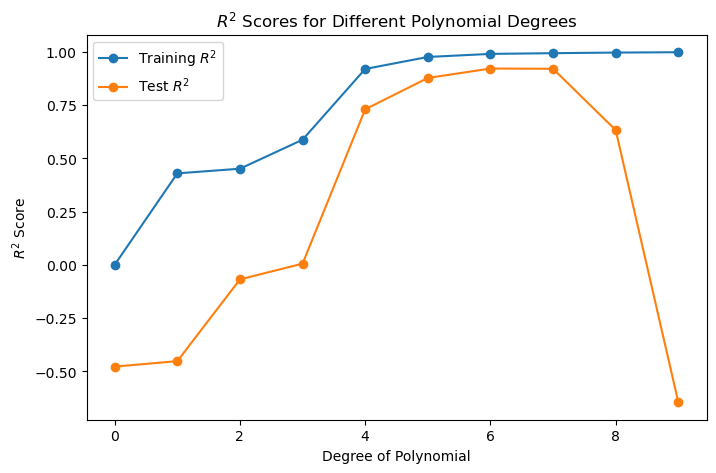

(np.int64(9), np.int64(9), np.int64(6))

In [35]:
answer_three()

1. Underfitting:

	•	Degree 0 is clearly underfitting. The  R^2  scores for both the training and test data are very low, close to zero, indicating that the model is too simple to capture any meaningful patterns in the data.

2. Overfitting:

	•	Degree 9 is overfitting. The training  R^2  score is very high, close to 1, but the test  R^2  score has dropped significantly. This large disparity between the training and test  R^2  scores indicates that the model is fitting the training data too closely and fails to generalize well to new, unseen data.

3. Good Generalization:

	•	Degree 6 provides good generalization. Both the training and test  R^2  scores are high and close to each other, indicating that the model is complex enough to capture the underlying patterns without overfitting.

Question 4

Training models on high degree polynomial features can result in overfitting. Train two models: a non-regularized LinearRegression model and a Lasso Regression model (with parameters alpha=0.01, max_iter=10000, tol=0.1) on polynomial features of degree 12. Return the  𝑅2  score for LinearRegression and Lasso model's test sets.

This function should return a tuple (LinearRegression_R2_test_score, Lasso_R2_test_score)

In [16]:
def answer_four():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression
    from sklearn.metrics import r2_score
    import numpy as np
    
    # Transform the data into polynomial features of degree 12
    poly = PolynomialFeatures(degree=12)
    X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
    X_test_poly = poly.transform(X_test.reshape(-1, 1))
    
    # Train the non-regularized Linear Regression model
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_poly, y_train)
    y_test_pred_lin = lin_reg.predict(X_test_poly)
    lin_reg_r2 = r2_score(y_test, y_test_pred_lin)
    
    # Train the Lasso Regression model
    lasso_reg = Lasso(alpha=0.01, max_iter=10000, tol=0.1)
    lasso_reg.fit(X_train_poly, y_train)
    y_test_pred_lasso = lasso_reg.predict(X_test_poly)
    lasso_r2 = r2_score(y_test, y_test_pred_lasso)
    
    
    return (lin_reg_r2, lasso_r2)

answer_four()

(-4.311973981201701, 0.6051396919570093)

Part 2 - Classification

For this section of the assignment we will be working with the UCI Mushroom Data Set stored in mushrooms.csv. The data will be used to trian a model to predict whether or not a mushroom is poisonous. The following attributes are provided:

Attribute Information:

cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s
cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
bruises?: bruises=t, no=f
odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
gill-attachment: attached=a, descending=d, free=f, notched=n
gill-spacing: close=c, crowded=w, distant=d
gill-size: broad=b, narrow=n
gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
stalk-shape: enlarging=e, tapering=t
stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s
stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s
stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
veil-type: partial=p, universal=u
veil-color: brown=n, orange=o, white=w, yellow=y
ring-number: none=n, one=o, two=t
ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

The data in the mushrooms dataset is currently encoded with strings. These values will need to be encoded to numeric to work with sklearn. We'll use pd.get_dummies to convert the categorical variables into indicator variables.

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


mush_df = pd.read_csv('assets/mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]


X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

Question 5

Using X_train and y_train from the preceeding cell, train a DecisionTreeClassifier with default parameters and random_state=0. What are the 5 most important features found by the decision tree?

This function should return a list of length 5 of the feature names in descending order of importance.

In [26]:
def answer_five():
    from sklearn.tree import DecisionTreeClassifier
    
    # Train the Decision Tree model
    model = DecisionTreeClassifier(random_state=0)
    model.fit(X_train2, y_train2)
    
    # Get feature importances
    importances = model.feature_importances_
    
    # Get the indices of the top 5 features
    indices = np.argsort(importances)[-5:][::-1]
    
    # Get the names of the top 5 features
    top_5_features = X_mush.columns[indices].tolist()
    
    return top_5_features

answer_five()

['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']

Question 6

For this question, use the validation_curve function in sklearn.model_selection to determine training and test scores for a Support Vector Classifier (SVC) with varying parameter values.

Create an SVC with default parameters (i.e. kernel='rbf', C=1) and random_state=0. Recall that the kernel width of the RBF kernel is controlled using the gamma parameter. Explore the effect of gamma on classifier accuracy by using the validation_curve function to find the training and test scores for 6 values of gamma from 0.0001 to 10 (i.e. np.logspace(-4,1,6)).

For each level of gamma, validation_curve will use 3-fold cross validation (use cv=3, n_jobs=2 as parameters for validation_curve), returning two 6x3 (6 levels of gamma x 3 fits per level) arrays of the scores for the training and test sets in each fold.

Find the mean score across the five models for each level of gamma for both arrays, creating two arrays of length 6, and return a tuple with the two arrays.

e.g.

if one of your array of scores is

array([[ 0.5,  0.4,  0.6],
       [ 0.7,  0.8,  0.7],
       [ 0.9,  0.8,  0.8],
       [ 0.8,  0.7,  0.8],
       [ 0.7,  0.6,  0.6],
       [ 0.4,  0.6,  0.5]])
   
it should then become

array([ 0.5,  0.73333333,  0.83333333,  0.76666667,  0.63333333, 0.5])
This function should return a tuple of numpy arrays (training_scores, test_scores) where each array in the tuple has shape (6,)

In [28]:
def answer_six():
    from sklearn.svm import SVC
    from sklearn.model_selection import validation_curve
    import numpy as np
    
    # Define the range of gamma values
    param_range = np.logspace(-4, 1, 6)
    
    # Create the SVC model with default parameters
    model = SVC(kernel='rbf', C=1, random_state=0)
    
    # Use validation_curve to get training and test scores
    train_scores, test_scores = validation_curve(
        model, X_train2, y_train2, param_name='gamma', param_range=param_range,
        cv=3, scoring='accuracy', n_jobs=2)
    
    # Calculate the mean scores across the 3 folds
    mean_train_scores = np.mean(train_scores, axis=1)
    mean_test_scores = np.mean(test_scores, axis=1)
    
    # Return the mean scores as a tuple
    return (mean_train_scores, mean_test_scores)

answer_six()

(array([0.89069424, 0.97275562, 0.99753816, 1.        , 1.        ,
        1.        ]),
 array([0.88987363, 0.9704579 , 0.99622518, 1.        , 1.        ,
        0.51649434]))

Question 7

Based on the scores from question 6, what gamma value corresponds to a model that is underfitting? What gamma value corresponds to a model that is overfitting? What choice of gamma would provide a model with good generalization performance on this dataset?

(Hint: Try plotting the scores from question 6 to visualize the relationship)

This function should return a tuple with the degree values in this order: (Underfitting, Overfitting, Good_Generalization)

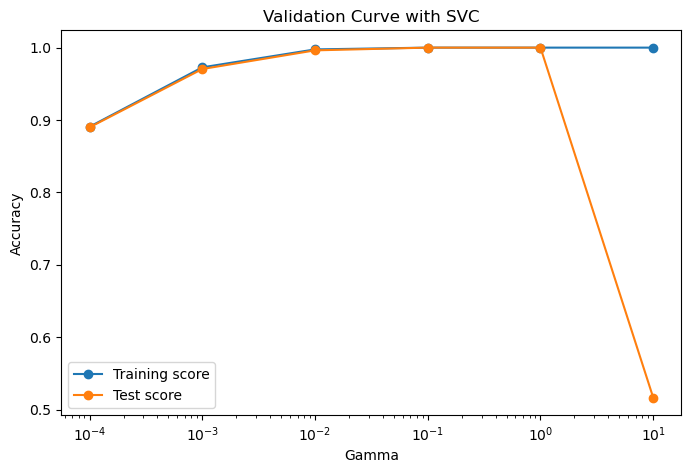

(np.float64(10.0), np.float64(10.0), np.float64(0.1))

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def answer_seven():
    # Get the results from question six
    train_scores, test_scores = answer_six()
    
    # Gamma values used in question six
    gamma_values = np.logspace(-4, 1, 6)
    
    # Plotting the results
    plt.figure(figsize=(8, 5))
    plt.plot(gamma_values, train_scores, label='Training score', marker='o')
    plt.plot(gamma_values, test_scores, label='Test score', marker='o')
    plt.xscale('log')
    plt.xlabel('Gamma')
    plt.ylabel('Accuracy')
    plt.title('Validation Curve with SVC')
    plt.legend()
    plt.show()
    
    # Identify underfitting, overfitting, and good generalization
    underfitting_gamma = gamma_values[np.argmin(train_scores + test_scores)]
    overfitting_gamma = gamma_values[np.argmax(train_scores - test_scores)]
    good_generalization_gamma = gamma_values[np.argmax(test_scores)]
    
    return (underfitting_gamma, overfitting_gamma, good_generalization_gamma)

answer_seven()